In [1]:
from keras_gan_copy import GAN
from load_dataset import parser
import tensorflow as tf
from tensorflow import keras

2022-09-16 16:42:03.164174: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-16 16:42:03.333138: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-16 16:42:03.333183: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-16 16:42:03.365481: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-16 16:42:04.246367: W tensorflow/stream_executor/platform/de

In [2]:
# parameters
latent_dim = 128
batch_size = 16

In [3]:
# Creating GAN
csm_gan = GAN(latent_dim=latent_dim)

2022-09-16 16:42:08.575294: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-09-16 16:42:08.575342: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-16 16:42:08.575376: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gaspard-HP-ZBook-15u-G2): /proc/driver/nvidia/version does not exist
2022-09-16 16:42:08.575725: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Compiling GAN
d_optimizer = keras.optimizers.Adam(learning_rate=0.003)
g_optimizer = keras.optimizers.Adam(learning_rate=0.03)
loss_fn=keras.losses.BinaryCrossentropy(from_logits=True)
#loss_fn = csm_gan.wasserstein_loss

csm_gan.compile(
    d_optimizer=d_optimizer,
    g_optimizer=g_optimizer,
    loss_fn=loss_fn
)

In [5]:
# Importing the dataset and creating the batches

tfile = "/home/gaspard/ETHZ/Master_Arbeit/acoupipe_datasets/training_1-100000_csmtriu_1src_he4.0625-1393.4375Hz_ds1-v001_13-Sep-2022.tfrecord"
dataset = tf.data.TFRecordDataset(filenames=[tfile])




# the parser convert the CSMTRIU into eigenvector
# TODO: need to be extended to also extract the eigenvectors.
dataset = dataset.map(parser)

# print one example of eigenvector:
print(type(dataset))

# create batches
dataset = dataset.shuffle(buffer_size=10).batch(batch_size)


<class 'tensorflow.python.data.ops.dataset_ops.MapDataset'>


In [6]:
# Training the GAN
csm_gan.fit(
    dataset,
    steps_per_epoch=100,
    epochs=10
)

Epoch 1/10
100/100 [==============================] - 23s 208ms/step - g_loss: 0.7235 - d_loss: 0.7066
Epoch 2/10
100/100 [==============================] - 20s 195ms/step - g_loss: 1.2011 - d_loss: 0.6485
Epoch 3/10
100/100 [==============================] - 19s 192ms/step - g_loss: 1.0475 - d_loss: 0.7702
Epoch 4/10
100/100 [==============================] - 22s 223ms/step - g_loss: 0.9398 - d_loss: 0.9061
Epoch 5/10
100/100 [==============================] - 22s 218ms/step - g_loss: 1.0552 - d_loss: 0.7786
Epoch 6/10
100/100 [==============================] - 20s 198ms/step - g_loss: 1.0198 - d_loss: 0.7860
Epoch 7/10
100/100 [==============================] - 23s 231ms/step - g_loss: 1.9127 - d_loss: 0.6680
Epoch 8/10
100/100 [==============================] - 23s 230ms/step - g_loss: 0.9629 - d_loss: 0.8650
Epoch 9/10
100/100 [==============================] - 23s 227ms/step - g_loss: 1.0318 - d_loss: 1.0308
Epoch 10/10
100/100 [==============================] - 22s 221ms/step - g

1/1 [==============================] - 0s 218ms/step
tf.Tensor(-0.6852408, shape=(), dtype=float32)
1/1 [==============================] - 0s 26ms/step
tf.Tensor(-0.8947011, shape=(), dtype=float32)
1/1 [==============================] - 0s 23ms/step
tf.Tensor(-0.74114686, shape=(), dtype=float32)
1/1 [==============================] - 0s 37ms/step
tf.Tensor(-0.48708546, shape=(), dtype=float32)
1/1 [==============================] - 0s 35ms/step
tf.Tensor(-1.4916836, shape=(), dtype=float32)
1/1 [==============================] - 0s 37ms/step
tf.Tensor(-0.20390865, shape=(), dtype=float32)
1/1 [==============================] - 0s 38ms/step
tf.Tensor(-0.84410477, shape=(), dtype=float32)
1/1 [==============================] - 0s 32ms/step
tf.Tensor(-1.5949543, shape=(), dtype=float32)
1/1 [==============================] - 0s 25ms/step
tf.Tensor(-0.7549382, shape=(), dtype=float32)
1/1 [==============================] - 0s 30ms/step
tf.Tensor(-0.6694096, shape=(), dtype=float32)
1/1 [

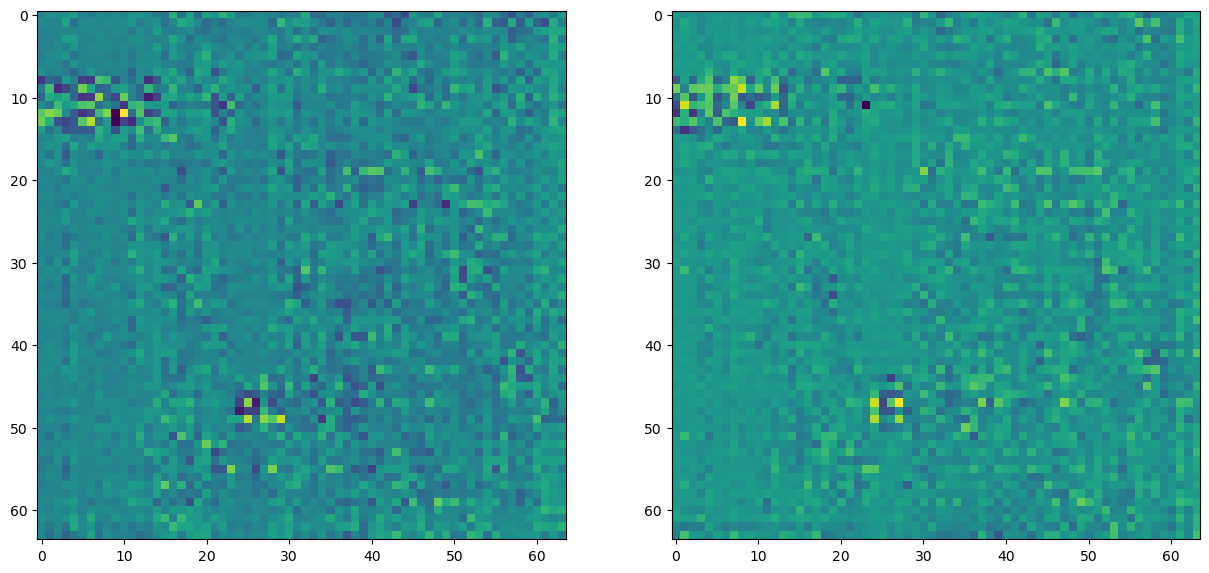

In [7]:
import matplotlib.pyplot as plt

# Generating a sample:
generated_eigenvector = csm_gan.get_csm()

if generated_eigenvector != None:
    real = generated_eigenvector[0,:,:,0]
    im = generated_eigenvector[0,:,:,1]

    fig = plt.figure(figsize=(15,15))
    plt.subplot(1,2,1)
    plt.imshow(real)
    plt.subplot(1,2,2)
    plt.imshow(im)
